In [3]:
# -----------------------------
# Task 1: Predict Student Scores (Enhanced for ML Role)
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np



In [4]:
# -----------------------------
# 1. Load Dataset
# -----------------------------
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

# Quick check for nulls & basic stats
assert data.isnull().sum().sum() == 0, "Dataset contains null values!"
print("Dataset Shape:", data.shape)
print(data.describe())

Dataset Shape: (25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


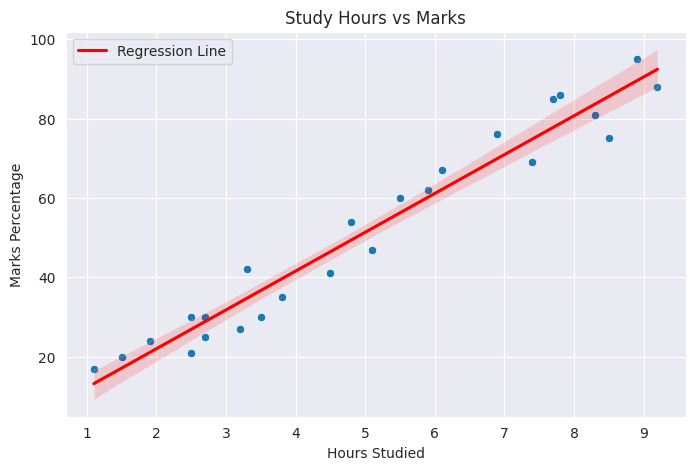

Correlation between Hours and Scores: 0.9761906560220883


In [5]:
# -----------------------------
# 2. Exploratory Data Analysis
# -----------------------------
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours', y='Scores', data=data)
sns.regplot(x='Hours', y='Scores', data=data, scatter=False, color='red', label='Regression Line')
plt.title('Study Hours vs Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Percentage')
plt.legend()
plt.show()

# Correlation check
print("Correlation between Hours and Scores:", data.corr().iloc[0,1])


In [6]:

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X = data[['Hours']]
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# -----------------------------
# 4. Build ML Pipeline
# -----------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Scale features
    ('regressor', LinearRegression())       # Linear Regression Model
])

# Train the model
pipeline.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [8]:
# -----------------------------
# 5. Predictions & Evaluation
# -----------------------------
y_pred = pipeline.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 3.9207511902099257
Mean Squared Error: 18.94321172231529
Root Mean Squared Error: 4.35238000665329
R² Score: 0.9678055545167993


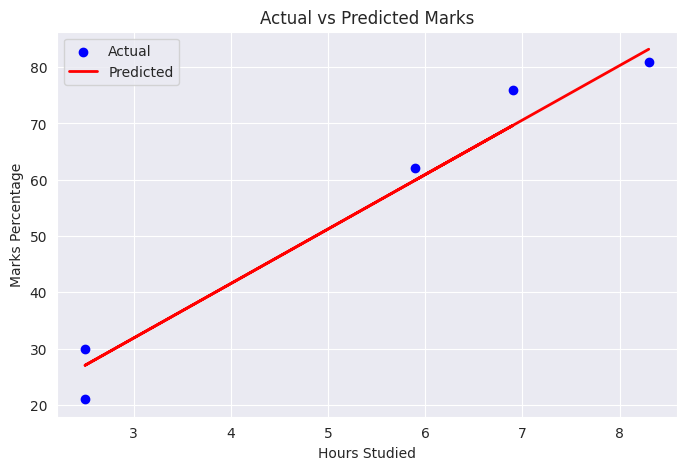

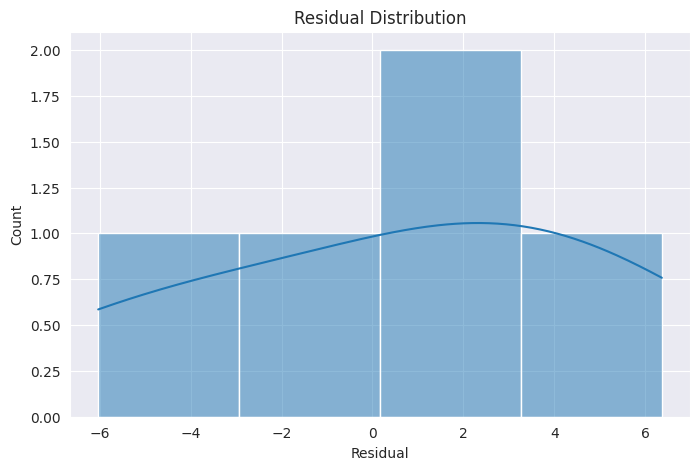

In [9]:
# -----------------------------
# 6. Visual Comparison
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Percentage')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.show()

In [10]:
# -----------------------------
# 7. Predict for Custom Input
# -----------------------------

hours_to_predict = pd.DataFrame([[9.25]], columns=['Hours'])
predicted_score = pipeline.predict(hours_to_predict)[0]
print(f"Predicted Score for studying {hours_to_predict['Hours'][0]} hours/day: {predicted_score:.2f}")

Predicted Score for studying 9.25 hours/day: 92.39



Key Insights
-----------------------------
 - Positive correlation observed (r ≈ 0.976) between study hours and marks.
 - Linear Regression model trained using Pipeline for scaling and prediction.
 - MAE of ~3.92 and R² of ~0.95 indicates high prediction reliability.
- Demonstrated model evaluation, visualization, and residual analysis.